# Динамическая модель движения автомобиля
 19.02.2020
###### Даниил Ханинаев, khaninaev@yahoo.com

In [1]:
from IPython.display import Image

Чтобы реализовать динамическую модель движения, нам необходимо проделать следующие шаги:
<ul>
<li>Ввести системы координат</li>
<li>Определить все сили и моменты, действующие на объект </li>
<li>Используя 2-ой закон Ньютона, составить дифференциальное уравнение, описывающее движение объекта</li>
</ul>



In [2]:
Image(url= "images/rigidbody.png", width=400)

Разделим нашу динамическую модель движения на две составляющие:
<ul>
<li>Динамическая модель продольного движения</li>
<li>Динамическая модель поперечного движения</li>
</ul>

In [3]:
Image(url= "images/Vehicle_axis.png", width=400)

### Динамическая модель продольного движения автомобиля

Ограничим движение автомобиля в плоскости XZ. 

Существует несколько сил, действующих на кузов автомобиля и шины, включая силу тяги, сопротивление качению, аэродинамическую силу и силу сопротивления, обусловленную гравитацией.
Динамическая модель продольного движения учитывает движение объекта по наклонной дороге.

![title](images/long_motion1.png)

Модель основана на динамике транспортного средства, генерирующего поступательное движение. На рисунке представлено типичное продольное движение транспортного средства по наклонной дороге. 

Силы, действующие на транспортное средство и шины:
<ul>
<li>$ F_{xf} $ и $ F_{xr} $ - усилие, передаваемое передним и задним колесами на дорогу</li>
<li>$ F_{aero} $ - аэродинамическая сила лобового сопртивления</li>
<li>$ R_{xf} $ и $ R_{xr} $ - сопротивление качению, соответсвенно переднего и заднего колеса</li>
<li>$ mgsin\alpha $ - сила сопротивления, обусловленная гравитацией (угол $\alpha$ - уклон дороги)</li>
</ul>

###### Получим дифференциальное уравнение:

\begin{align}
     m\ddot{x} &= F_{xf} + F_{xr} - F_{aero} - R_{xf} - R_{xr} - mgsin\alpha \quad(1)
\end{align}

Подведенный от трансмиссии к колесам крутящий момент создает силу тяги $F_x$, обеспечивающую движение автомобиля в результате взаимодействия колес с дорогой. 


Можно сделать вывод о том, что для того чтобы автомобиль двигался в положительном направлении (согласно рисунку), необходимо, чтобы сила тяги была достаточной для преодоления аэродинамической силы, силы тяжести и сил сопротивления качению колес. 

Суммарная сила сопротивления $F_{load}$:

\begin{align}
    R_x &= R_{xf} + R_{xr} \\
    F_g &= mgsin\alpha \\
    F_{load} &= F_{aero} + R_x + F_g \quad(2)\\
\end{align}

Аэродинамическая сила $ F_{aero}  $ определяется как (считаем, что скорость ветра отсутствует):


\begin{align}
    F_{aero} &= \frac{1}{2} C_a \rho A \dot{x}^2,\\
\end{align}

где $\rho$ - плотность воздуха, кг/м3;$$$$
$C_a$ - коэффициент аэродинамического сопротивления; $$$$
$A$ - эффективная площадь сопротивления автомобиля; $$$$
$\dot{x} = V_x$ - продольная скорость автомобиля.

Учитывая фиксированное миделевое сечение автомобиляя и нормальное атмосферное давление, мы можем определить простой 
коэффициент аэродинамического сопротивления $c_a$ и умножить его на квадрат продольной скорости, чтобы получить силу лобового сопротивления.

\begin{align}
    F_{aero} &= c_a \dot{x}^2,\\
\end{align}

Сила сопротивления качению в нормальных условиях может быть определена как:

\begin{align}
    R_x &= N(\hat{c}_{r,0} + \hat{c}_{r,1}|\dot{x}| + \hat{c}_{r,2}\dot{x}^2) \approx c_{r,1} \dot{x}\\
\end{align}

где $c_{r,1}$ - коэффициент трения качения, который в общем случае лежит в диапазоне значений от 0.04 до 0.01. Для  пассажирских автомобилей коэффициент имеет величину 0.015 (Wong, 2001).

##### Динамическая модель привода

Как уже упоминалось ранее, сила тяги $F_x$, передаваемая колесами на дорогу, является основной силой, которая заставляет автомобиль двигаться вперед.

Эта сила зависит от разницы между вращательной скоростю колеса  $r_{eff}\omega_w $ и продольной скоростю транспортного средства $\dot{x}$.

В свою очередь, угловая скорость вращения колеса $\omega_w $ сильно зависит от динамических параметров привода. Основные компоненты привода показаны на рисунке ниже.

In [11]:
Image(url= "images/transmission.png", width=700)

Согласно рисунку, можем получить следующие соотношения:

1. Угловая скорость вращения колеса $\omega_w $ выражается как $\omega_w = (GR)\omega_e $,  где $\omega_e$ - угловая скрость двигателя;
$GR$ - передаточный коэффициент.

2. Продольная скорость $\dot{x}=r_{eff}\omega_w $, где $r_{eff}$ - эффективный радиус шины.

3. Продольное ускорение $\ddot{x}=r_{eff}GR\dot{\omega_e} \quad(3)$.

На рисунке ниже изображена диаграмма передачи угловых скоростей и моментов от двигателя к колесу, а также получены их соотношения для каждого узла привода, где $I_x$ - момент инерции, $M_x$ - вращающий момент, $\omega_x $ - угловая скорость.

In [12]:
Image(url= "images/powerflow.png", width=700)

Если мы вернемся к исходной модели продольного движения, то увидим зависимость силы тяги $F_x$ от углового ускорения двигателя $\dot{\omega_e}$. Выразим силу тяги через уравнения (1), (2) и (3):

$$ F_x = m\ddot{x} + F_{load} = mr_{eff}GR\dot{\omega_e}\quad(4)$$

Сгруппируя полученное уравнение (4) и уравнения из рисунка выше, получим динамическую модель привода:

 $ (I_e + I_t + I_wGR^2 + m(GR^2)r_{eff}^2)\dot{\omega_e}= T_{engine} - (GR)(r_{eff}F_{load})$

Введем $J_e = I_e + I_t + I_wGR^2 + m(GR^2)r_{eff}^2$.

Модель упрощается до следующего уравнения, которое уравновешивает крутящий момент двигателя $T_{engine}$ с суммарным крутящим моментом сопротивления $T_{load} = (GR)(r_{eff}F_{load})$ для управления ускорением двигателя и, следовательно, продольным ускорением автомобиля:

 ### $$ J_e\dot{\omega_e}= T_{engine} - (GR)(r_{eff}F_{load})$$

### Коэффициент скольжения

Шина является связующим звеном между автомобилем и дорогой, и внешние силы, действующие на транспортное средство, полностью определяются способностями шины генерировать их. Таким образом, чтобы полностью проанализировать динамику автомобиля и разработать систему управления на основе динамических моделей, очень важно иметь хорошую модель, которая бы учитывала поведение шины, генерирующей силу во всем ее рабочем диапазоне.

Для этого введем такое понятие как коэффициент скольжения $s$:

 $$s = \frac{\omega_w r_e - V_{x}}{V_{x}}$$

Коэффициент скольжения отражает взаимосвязь между деформацией шины и продольными силами, действующими на нее.

In [32]:
Image(url= "images/slip_ratio.png", width=450)

При ускорении или торможении наблюдаемая угловая скорость колеса не соответствует ожидаемой скорости продольного движения, что приводит к скольжению между колесом и дорогой в дополнение к качению.

Рассмотрим два случая различия между рассматриваемыми скоростями:

1. $\omega_w r_e < V_{x}$ - это явление в автомобильным терминологии называется Юз - проскальзывание колёс при торможении.

2. $\omega_w r_e > V_{x}$ - в этом случае колеса буксуют, обычно буксование возникает вследствие превышения силой тяги силы сцепления колеса на обледенелых дорогах или при дрифте.

## Реализация динамической модели продольного движения автомобиля

В этом блокноте Jupyter реализуем динамическую модель продольного движения автомобиля.

Модель принимает на вход положение педали акселератора в процентах $x_\theta \in [0,1]$, которое обеспечивает крутящий момент двигателя и впоследствии придает транспортному средству движения вперед.

Динамические уравнения состоят из нескольких этапов преобразования входного сигнала в частоту вращения колеса (двигатель -> преобразователь момента -> трансмиссия -> колесо). Эти этапы объединены в один инерционный член $J_e$, который используется в следующих комбинированных динамических уравнениях привода:


\begin{align}
    J_e \dot{\omega}_e &= T_e - (GR)(r_{eff} F_{load}) \\ m\ddot{x} &= F_x - F_{load},
\end{align}

где $T_e$ - крутящий момент двигателя, $GR$ - передаточный коэффициент, $r_{eff}$ - эффективный радиус шины, $m$ - масса автомобиля, $x$ - положение транспортного средства, $F_x$ - усилие, передаваемое шиной на дорогу и $F_{load}$ - общая сила сопротивления.

Крутящий момент двигателя вычисляется по положению педали акселератора и угловой скорости двигателя $\omega_e$ с использованием упрощенной квадратичной модели:

\begin{align}
    T_e = x_{\theta}(a_0 + a_1 \omega_e + a_2 \omega_e^2)
\end{align}

Суммарная сила сопротивления состоит их аэродинамической силы $F_{aero}$, гравитационной силы  $F_g$  и силы сопротивления качению колес $R_x$.  Аэродинамическое сопротивление - это квадратичная модель, а сопротивление качению - линейная модель.

\begin{align}
    F_{load} &= F_{aero} + R_x + F_g \\
    F_{aero} &= \frac{1}{2} C_a \rho A \dot{x}^2 = c_a \dot{x}^2\\
    R_x &= N(\hat{c}_{r,0} + \hat{c}_{r,1}|\dot{x}| + \hat{c}_{r,2}\dot{x}^2) \approx c_{r,1} \dot{x}\\
    F_g &= mg\sin{\alpha}
\end{align}

Сила тяги (усилие, передаваемое шиной на дорогу) рассчитывается с использованием уравнений скорости двигателя и скольжения колес.

\begin{align}
    \omega_w &= (GR)\omega_e \\
    s &= \frac{\omega_w r_e - \dot{x}}{\dot{x}}\\
    F_x &= \left\{\begin{array}{lr}
        cs, &  |s| < 1\\
        F_{max}, & \text{иначе},
        \end{array}\right\} 
\end{align}

где $\omega_w$ - угловая скорость колеса, а $s$ - коэффициент скольжения.


Ниже задается модель продольного движения внутри класса на языке программирования Python.

Автомобиль начинает движение с начальной скоростью 5 м/с и частотой вращения двигателя 100 рад/с. Для численного интегрирования используется период дискретизации 0,01с. 

In [4]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class Vehicle():
    def __init__(self):
 
        # ==================================
        #  Parameters
        # ==================================
    
        #Accelerator Pedal Position to engine torque
        self.a_0 = 400
        self.a_1 = 0.1
        self.a_2 = -0.0002
        
        # Gear ratio, effective radius, mass + inertia
        self.GR = 0.35
        self.r_e = 0.3
        self.J_e = 10
        self.m = 2000
        self.g = 9.81
        
        # Aerodynamic and friction coefficients
        self.c_a = 1.36
        self.c_r1 = 0.01
        
        # Tire force 
        self.c = 10000
        self.F_max = 10000
        
        # State variables
        self.x = 0
        self.v = 5
        self.a = 0
        self.w_e = 100
        self.w_e_dot = 0
        
        self.sample_time = 0.01
        
    def reset(self):
        # reset state variables
        self.x = 0
        self.v = 5
        self.a = 0
        self.w_e = 100
        self.w_e_dot = 0

Функция $\textit{step}$ принимает положение педали акселератора $x_\theta$   и угол наклона $\alpha$ в качестве входных данных и выполняет численное интегрирование за один шаг для обновления переменных состояния.

In [5]:
class Vehicle(Vehicle):
    def step(self, throttle, alpha):
        # ==================================
        #  Implementation of vehicle model
        # ==================================
        T_e = throttle * (self.a_0 + self.a_1*self.w_e + self.a_2*self.w_e*self.w_e)
        
        F_aero = self.c_a * self.v * self.v
        R_x = self.c_r1 * self.v
        F_g = self.m * self.g * np.sin(alpha)
        F_load = F_aero + R_x + F_g
        
        self.w_e_dot = (T_e - self.GR * self.r_e * F_load) / self.J_e
        self.w_e += self.w_e_dot * self.sample_time
        
        w_w = self.GR * self.w_e
        s = (w_w * self.r_e - self.v) / self.v
        
        F_x = self.c * s if np.abs(s) < 1 else self.F_max
        
        self.a = (F_x - F_load) / self.m
        self.v += self.a * self.sample_time
        self.x += self.v * self.sample_time
        


Используя модель, в ячейке ниже мы можем посылаем постоянное положение педали акселератора на транспортное средство. Заметим, что скорость сходится к фиксированному значению, это происходит из-за аэродинамического сопротивления и установленного предела для силы тяги. 

Аналогичный профиль скорости можно увидеть, установив отрицательный угол наклона $\alpha$. В этом случае гравитация разгоняет транспортное средство до предельной скорости, где оно уравновешивается силой сопротивления.

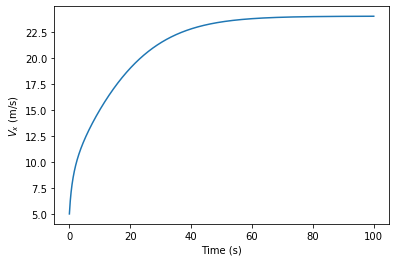

In [6]:
sample_time = 0.01
time_end = 100
model = Vehicle()

t_data = np.arange(0,time_end,sample_time)
v_data = np.zeros_like(t_data)

# Accelerator pedal position in percentages between 0 and 1
throttle = 0.2

# incline angle (in radians)
alpha = 0

for i in range(t_data.shape[0]):
    v_data[i] = model.v
    model.step(throttle, alpha)
    
plt.plot(t_data, v_data)
plt.ylabel('$V_x$ (m/s)')
plt.xlabel('Time (s)')
plt.show()

Теперь мы будем вести машину вверх по склону, как показано на рисунке ниже.

In [34]:
Image(url= "images/incline_road.png", width=600)

Для этого в течение 20 секунд предусмотрен трапецевидный профиль входа - положения педали акселератора (throttle), как показано на рисунке ниже.

In [45]:
Image(url= "images/throttle.png", width=700)

Автомобиль начинает движение на 20% положении педали акселератора и постепенно значение увеличивается до 50%. Это состояние сохраняется в течение 10 секунд, когда автомобиль поднимается по крутому склону, затем после этого автомобиль понижает положение педали до 0.

В ячейке ниже реализовано изменение угла наклона $\alpha (x)$ в зависимости от пройденного пути и изменение положения педали акселератора $x_\theta (t)$ в зависимости от времени, которые в дальнейшем подаются на вход динамической модели. 
Позиция автомобиля $x(t)$ передается в массив x_data . Далее этот массив будет использоваться для оценки полученной реализации.

In [28]:
time_end = 20
t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
th_data = np.zeros_like(t_data)
alph_data = np.zeros_like(t_data)

# reset the states
model.reset()

# throttle percentage between 0 and 1
throttle = 0.2

# incline angle (in radians)
alpha = 0

for i in range(t_data.shape[0]):
    
    if t_data[i] < 5:
        throttle += 0.3 / 500
    elif t_data[i] > 15:
        throttle -= 0.5 / 500
        
    x_data[i] = model.x
    
    if 0 < x_data[i] < 60:
        alpha = np.arctan(1 / 20)
    elif 60 < x_data[i] < 150:
        alpha = np.arctan(1 / 10)
    else:
        alpha = 0
    
    th_data[i] = throttle
    alph_data[i] = alpha
    model.step(throttle, alpha)


На рисунке ниже представлен график перемещения автомобиля. Как мы видим, пройденный путь соответствует заданному при движении по склону (рисунок выше).

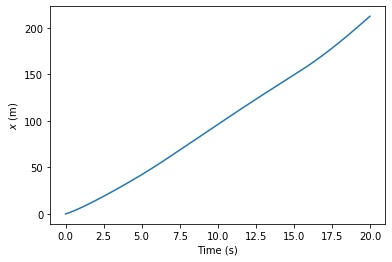

In [29]:
# Plot x vs t for visualization
plt.plot(t_data, x_data)
plt.ylabel('$x$ (m)')
plt.xlabel('Time (s)')
plt.show()

На рисунке ниже представлен график перемещения автомобиля. 

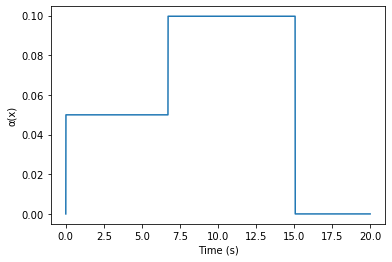

In [27]:
plt.plot(t_data, alph_data)
plt.ylabel('\u03B1(x)')
plt.xlabel('Time (s)')
plt.show()

На рисунке ниже представлен график зависимости положения педали акселератора от времени. Мы видим, что автомобиль пересекает склон на ~15 секунде, где вход (положение педали акселератора) начинает уменьшаться.

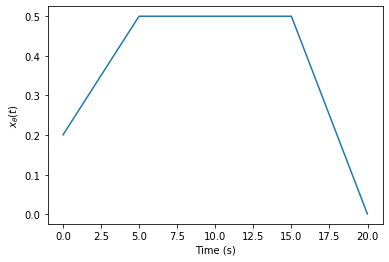

In [31]:
plt.plot(t_data, th_data)
plt.ylabel('$x_{\u03B8}(t)$')
plt.xlabel('Time (s)')
plt.show()

Как мы видим, пройденный путь соответствует заданному при движении по склону (рисунок в ячейке [34]). А также полученное положение педали акселератора соответствует заданному трапецевидному профилю входа (рисунок в ячейке [45]), что в свою очередь означает, что мы корректно реализовали динамическую модель продольного движения автомобиля.

###### Источники
1. Rajamani R. (2012) Vehicle Dynamics and Control. Mechanical Engineering Series. Springer, Boston, MA